In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
BD_Atun=pd.read_csv("BD_Evaluación_DS/Categorías/BD_Atún.csv", sep=';',encoding='latin-1')
BD_Cereales=pd.read_csv("BD_Evaluación_DS/Categorías/BD_Cereales.csv", sep=';',encoding='latin-1')
BD_Snacks=pd.read_csv("BD_Evaluación_DS/Categorías/BD_Snacks.csv", sep=';',encoding='latin-1')

In [ ]:
Fallecidos_Covid19=pd.read_csv("BD_Evaluación_DS/Variables/Fallecidos_Covid19.csv", sep=';',encoding='latin-1')
Festividades=pd.read_csv("BD_Evaluación_DS/Variables/Festividades.csv", sep=';',encoding='latin-1')
Positivos_Covid19=pd.read_csv("BD_Evaluación_DS/Variables/Positivos_Covid19.csv", sep=';',encoding='latin-1')
Precio_Huevo=pd.read_csv("BD_Evaluación_DS/Variables/Precio_Huevo.csv", sep=';',encoding='latin-1')
Precio_Pollo=pd.read_csv("BD_Evaluación_DS/Variables/Precio_Pollo.csv", sep=';',encoding='latin-1')
Tipo_Cambio=pd.read_csv("BD_Evaluación_DS/Variables/Tipo_Cambio.csv", sep=';',encoding='latin-1')

In [ ]:
BD_Atun=pd.read_csv("BD_Evaluación_DS/Categorías/BD_Atún.csv", sep=';',encoding='latin-1')
# Utilizar el método rename con str.replace para quitar los espacios de los nombres de las columnas
BD_Cereales.rename(columns=lambda x: x.replace(' ', ''), inplace=True)
BD_Cereales = BD_Cereales.drop(columns='Unnamed:9')
# Reemplaza comas, espacios y guiones por una cadena vacía en todo el DataFrame usando una expresión regular
BD_Cereales = BD_Cereales.replace(r'[, -]', '', regex=True)
# Reempazamos los vacios por NULO
BD_Cereales.replace('', pd.NA, inplace=True)

BD_Cereales['Día'] = pd.to_datetime(BD_Cereales['Día'], format='%d/%m/%Y')
BD_Cereales['Mes'] = BD_Cereales['Mes'].astype(str)
BD_Cereales['Retail'] = BD_Cereales['Retail'].astype(str)
BD_Cereales['Zona'] = BD_Cereales['Zona'].astype(str)
BD_Cereales['Venta_Unidades'] = pd.to_numeric(BD_Cereales['Venta_Unidades'], errors='coerce')
BD_Cereales['Venta_Soles'] = pd.to_numeric(BD_Cereales['Venta_Soles'], errors='coerce')
BD_Cereales['PVP_Unitario'] = pd.to_numeric(BD_Cereales['PVP_Unitario'], errors='coerce')
BD_Cereales['Inventario_Unidades'] = pd.to_numeric(BD_Cereales['Inventario_Unidades'], errors='coerce')

# Imputa valores faltantes con la media de cada columna
BD_Cereales['Venta_Unidades'].fillna(BD_Cereales['Venta_Unidades'].mean(), inplace=True)
BD_Cereales['Venta_Soles'].fillna(BD_Cereales['Venta_Soles'].mean(), inplace=True)
BD_Cereales['PVP_Unitario'].fillna(BD_Cereales['PVP_Unitario'].mean(), inplace=True)
BD_Cereales['Inventario_Unidades'].fillna(BD_Cereales['Inventario_Unidades'].mean(), inplace=True)

### ETL
##### probando

In [26]:
BD_Cereales

,Año,Día,Mes,Retail,Zona,Venta_Unidades,Venta_Soles,PVP_Unitario,Inventario_Unidades,Unnamed: 9
0,2018,2/01/2018,Enero,Cliente_1,CENTRO,6.0,86.0,17.0,-,NaN
1,2018,3/01/2018,Enero,Cliente_1,CENTRO,3.0,28.0,10.9,-,NaN
2,2018,4/01/2018,Enero,Cliente_1,CENTRO,2.0,18.0,10.9,-,NaN
3,2018,5/01/2018,Enero,Cliente_1,CENTRO,7.0,65.0,10.9,-,NaN
4,2018,6/01/2018,Enero,Cliente_1,CENTRO,6.0,55.0,10.9,-,NaN
...,...,...,...,...,...,...,...,...,...,...
25459,2023,25/06/2023,Junio,Cliente_7,SUR,27.0,457.0,19.9,428.0,NaN
25460,2023,26/06/2023,Junio,Cliente_7,SUR,16.0,320.0,23.6,412.0,NaN
25461,2023,27/06/2023,Junio,Cliente_7,SUR,17.0,332.0,23.0,395.0,NaN
25462,2023,28/06/2023,Junio,Cliente_7,SUR,14.0,280.0,23.6,417.0,NaN


In [29]:
print(BD_Cereales.columns)

Index(['Año', 'Día', 'Mes', 'Retail', 'Zona', 'Venta_Unidades', 'Venta_Soles',
       'PVP_Unitario', 'Inventario_Unidades'],
      dtype='object')


In [28]:
# Utilizar el método rename con str.replace para quitar los espacios de los nombres de las columnas
BD_Cereales.rename(columns=lambda x: x.replace(' ', ''), inplace=True)
BD_Atun.rename(columns=lambda x: x.replace(' ', ''), inplace=True)
BD_Snacks.rename(columns=lambda x: x.replace(' ', ''), inplace=True)

#borrar columna que no se usará
BD_Cereales = BD_Cereales.drop(columns='Unnamed:9')

In [30]:
# Reemplaza comas, espacios y guiones por una cadena vacía en todo el DataFrame usando una expresión regular
BD_Cereales = BD_Cereales.replace(r'[, -]', '', regex=True)
# Reempazamos los vacios por NULO
BD_Cereales.replace('', pd.NA, inplace=True)

In [31]:
BD_Cereales['Día'] = pd.to_datetime(BD_Cereales['Día'], format='%d/%m/%Y')
BD_Cereales['Mes'] = BD_Cereales['Mes'].astype(str)
BD_Cereales['Retail'] = BD_Cereales['Retail'].astype(str)
BD_Cereales['Zona'] = BD_Cereales['Zona'].astype(str)
BD_Cereales['Venta_Unidades'] = pd.to_numeric(BD_Cereales['Venta_Unidades'], errors='coerce')
BD_Cereales['Venta_Soles'] = pd.to_numeric(BD_Cereales['Venta_Soles'], errors='coerce')
BD_Cereales['PVP_Unitario'] = pd.to_numeric(BD_Cereales['PVP_Unitario'], errors='coerce')
BD_Cereales['Inventario_Unidades'] = pd.to_numeric(BD_Cereales['Inventario_Unidades'], errors='coerce')

In [33]:
# Imputa valores faltantes con la media de cada columna
BD_Cereales['Venta_Unidades'].fillna(BD_Cereales['Venta_Unidades'].mean(), inplace=True)
BD_Cereales['Venta_Soles'].fillna(BD_Cereales['Venta_Soles'].mean(), inplace=True)
BD_Cereales['PVP_Unitario'].fillna(BD_Cereales['PVP_Unitario'].mean(), inplace=True)
BD_Cereales['Inventario_Unidades'].fillna(BD_Cereales['Inventario_Unidades'].mean(), inplace=True)

In [32]:
BD_Cereales.dtypes

Año                             int64
Día                    datetime64[ns]
Mes                            object
Retail                         object
Zona                           object
Venta_Unidades                float64
Venta_Soles                   float64
PVP_Unitario                  float64
Inventario_Unidades           float64
dtype: object

In [34]:
BD_Cereales.isnull().sum()

Año                    0
Día                    0
Mes                    0
Retail                 0
Zona                   0
Venta_Unidades         0
Venta_Soles            0
PVP_Unitario           0
Inventario_Unidades    0
dtype: int64

In [ ]:
# Convierte la columna 'mi_columna' a números y luego verifica los valores no numéricos usando isna()
no_numeros = BD_Cereales['Venta_Unidades'][pd.to_numeric(BD_Cereales['Venta_Unidades'], errors='coerce').isna()]

# Imprime los valores no numéricos
print(no_numeros)

## EDA

In [39]:
#matriz de correlacion
correlation_matrix = BD_Cereales.corr()

C:\Users\KEYLLA\AppData\Local\Temp\ipykernel_16672\3557042957.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = BD_Cereales.corr()


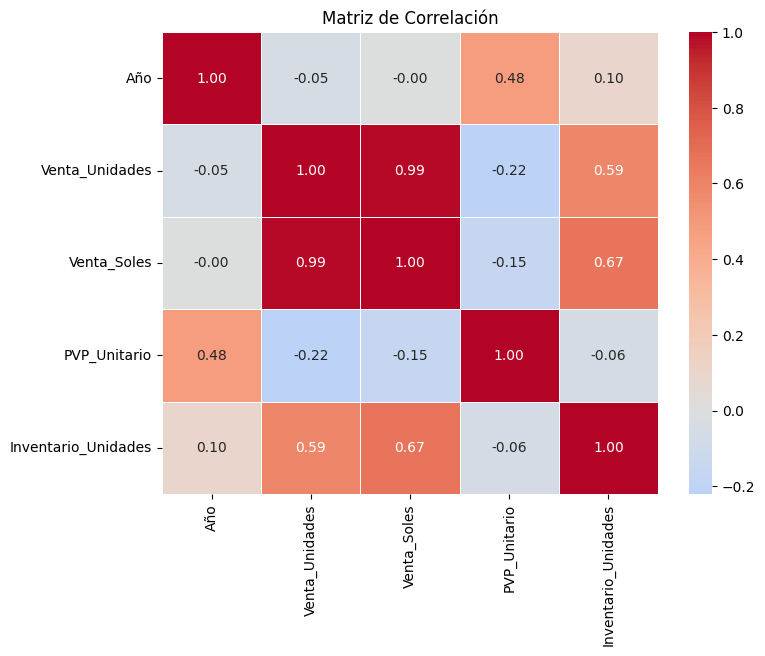

In [40]:
# analizamos el gráfico del mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [48]:
# Función para realizar el análisis de frecuencia
def analisis_frecuencia(dataframe, columna):
    frecuencia = dataframe[columna].value_counts()
    return frecuencia

# Ejemplo: Análisis de frecuencia para la columna 'Retailer' en cada tabla
frecuencia_cereales_retail = analisis_frecuencia(BD_Cereales, 'Retail')
frecuencia_cereales_zona = analisis_frecuencia(BD_Cereales, 'Zona')

In [47]:
BD_Cereales.columns

Index(['Año', 'Día', 'Mes', 'Retail', 'Zona', 'Venta_Unidades', 'Venta_Soles',
       'PVP_Unitario', 'Inventario_Unidades'],
      dtype='object')

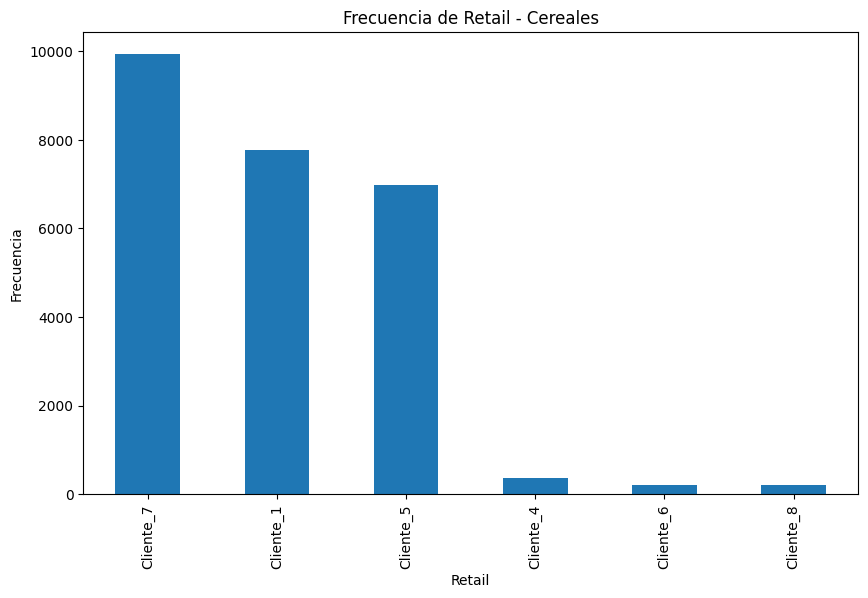

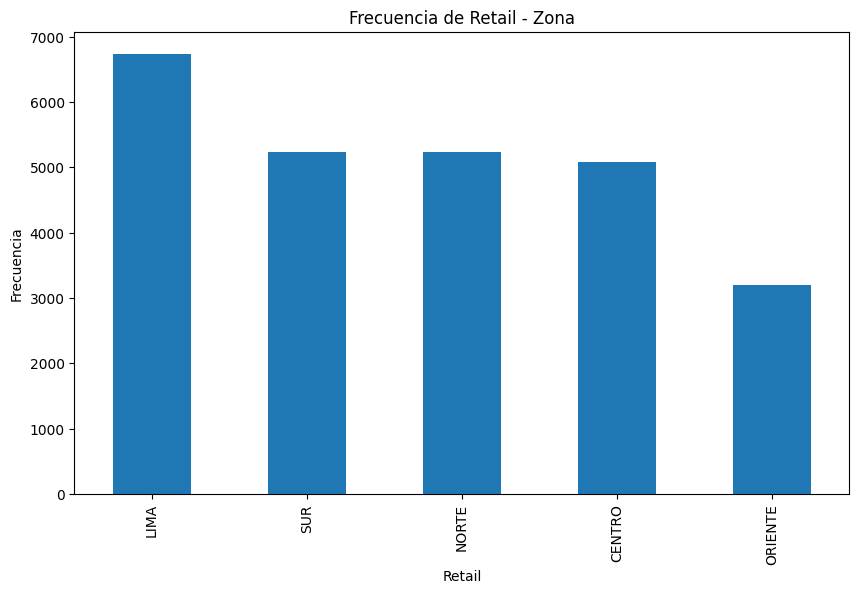

In [49]:
# Función para graficar la frecuencia
def graficar_frecuencia(frecuencia, titulo):
    plt.figure(figsize=(10, 6))
    frecuencia.plot(kind='bar')
    plt.xlabel('Retail')
    plt.ylabel('Frecuencia')
    plt.title(titulo)
    plt.show()

# Graficar la frecuencia para la columna 'Retailer' en cada tabla
graficar_frecuencia(frecuencia_cereales_retail, 'Frecuencia de Retail - Cereales')
graficar_frecuencia(frecuencia_cereales_zona, 'Frecuencia de Retail - Zona')

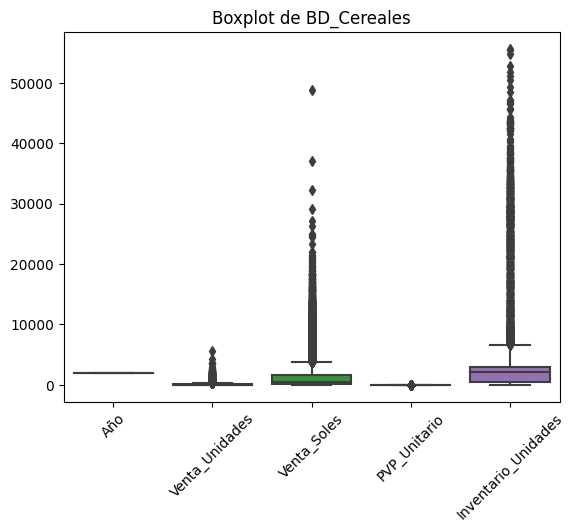

In [52]:
# Suponiendo que tienes un DataFrame llamado BD_Cereales y deseas visualizar boxplots para todas las columnas numéricas
sns.boxplot(data=BD_Cereales)
plt.xticks(rotation=45)
plt.title('Boxplot de BD_Cereales')
plt.show()

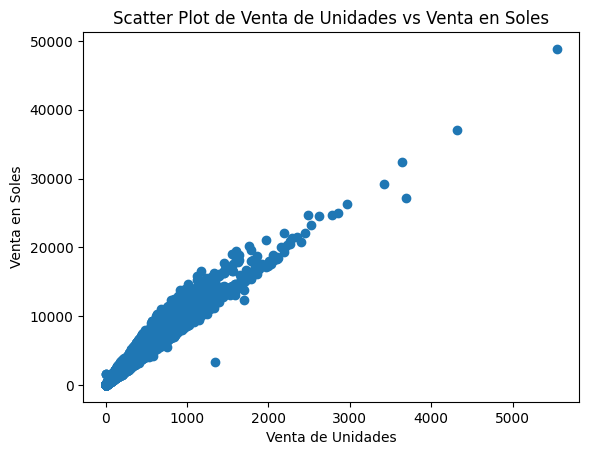

In [53]:
# Suponiendo que tienes un DataFrame llamado BD_Cereales y deseas generar un scatter plot para las columnas 'Venta_Unidades' y 'Venta_Soles'
plt.scatter(BD_Cereales['Venta_Unidades'], BD_Cereales['Venta_Soles'])
plt.xlabel('Venta de Unidades')
plt.ylabel('Venta en Soles')
plt.title('Scatter Plot de Venta de Unidades vs Venta en Soles')
plt.show()

In [54]:
# Suponiendo que tienes un DataFrame llamado BD_Cereales y deseas detectar valores atípicos en la columna 'Venta_Unidades'
Q1 = BD_Cereales['Venta_Unidades'].quantile(0.25)
Q3 = BD_Cereales['Venta_Unidades'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

valores_atipicos = BD_Cereales[(BD_Cereales['Venta_Unidades'] < limite_inferior) | (BD_Cereales['Venta_Unidades'] > limite_superior)]
print(valores_atipicos)

        Año        Día        Mes     Retail  Zona  Venta_Unidades  \
1857   2018 2018-01-02      Enero  Cliente_1  LIMA           392.0   
1858   2018 2018-01-03      Enero  Cliente_1  LIMA           370.0   
1859   2018 2018-01-04      Enero  Cliente_1  LIMA           677.0   
1860   2018 2018-01-05      Enero  Cliente_1  LIMA           681.0   
1861   2018 2018-01-06      Enero  Cliente_1  LIMA           644.0   
...     ...        ...        ...        ...   ...             ...   
18779  2021 2021-06-26      Junio  Cliente_7  LIMA           410.0   
18959  2021 2021-12-23  Diciembre  Cliente_7  LIMA           386.0   
19046  2022 2022-03-20      Marzo  Cliente_7  LIMA           376.0   
19396  2023 2023-03-05      Marzo  Cliente_7  LIMA           360.0   
19410  2023 2023-03-19      Marzo  Cliente_7  LIMA           523.0   

       Venta_Soles  PVP_Unitario  Inventario_Unidades  
1857        4411.0          13.3          2924.770237  
1858        3432.0          11.0          2924.

In [64]:
# Suponiendo que deseas analizar las ventas de unidades a lo largo de los meses en BD_Cereales
ventas_por_mes = BD_Cereales.groupby(BD_Cereales['Día'].dt.to_period('M'))['Venta_Unidades'].sum()

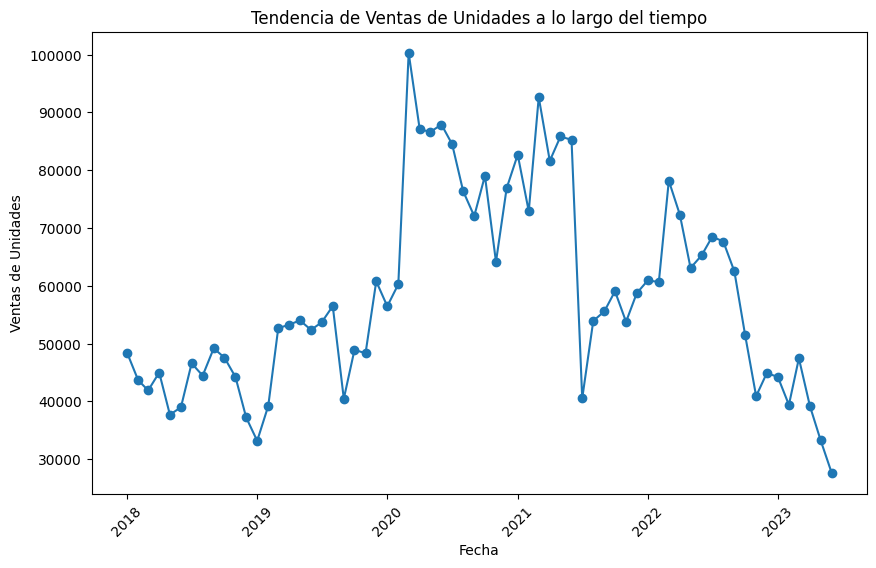

In [65]:
# Convertir el índice de tipo Period a formato de fecha (datetime)
ventas_por_mes.index = ventas_por_mes.index.to_timestamp()

plt.figure(figsize=(10, 6))
plt.plot(ventas_por_mes.index, ventas_por_mes.values, marker='o', linestyle='-')
plt.xlabel('Fecha')
plt.ylabel('Ventas de Unidades')
plt.title('Tendencia de Ventas de Unidades a lo largo del tiempo')
plt.xticks(rotation=45)
plt.show()

In [51]:
# Estadísticas descriptivas solo para la columna 'Venta_Unidades'
venta_unidades_stats = BD_Cereales.describe()
print("Estadísticas descriptivas para la columna 'Venta_Unidades' en la categoría de cereales:")
print(venta_unidades_stats)

Estadísticas descriptivas para la columna 'Venta_Unidades' en la categoría de cereales:
                Año  Venta_Unidades   Venta_Soles  PVP_Unitario  \
count  25464.000000    25464.000000  25464.000000  25464.000000   
mean    2020.492735      150.828532   1587.287996     13.485853   
std        1.559218      271.495484   2725.044335      2.604835   
min     2018.000000        1.000000      5.000000      3.000000   
25%     2019.000000       13.000000    150.000000     11.400000   
50%     2021.000000       43.000000    467.000000     13.100000   
75%     2022.000000      150.828532   1587.287996     15.000000   
max     2023.000000     5540.000000  48836.000000     23.600000   

       Inventario_Unidades  
count         25464.000000  
mean           2924.770237  
std            5272.010576  
min               1.000000  
25%             429.000000  
50%            2064.500000  
75%            2924.770237  
max           55626.000000  


In [ ]:
# Obtener las estadísticas descriptivas para la columna 'Venta_Unidades'
venta_unidades_stats = BD_Cereales['Venta_Unidades'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
print("Estadísticas descriptivas para la columna 'Venta_Unidades' en la categoría de cereales:")
print(venta_unidades_stats)

In [ ]:
estadisticas_descriptivas=BD_Categorias.describe()
print(estadisticas_descriptivas)

In [ ]:
plt.figure(figsize=(10, 6))  # Opcional: ajusta el tamaño de la figura

# Utiliza plt.hist() para generar el histograma
plt.hist(BD_Cereales['Venta_Unidades'], bins=20, color='blue', alpha=0.7)

# Añade títulos y etiquetas a los ejes
plt.title('Histograma de Venta de Unidades')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Frecuencia')

# Muestra el histograma
plt.show()

In [ ]:
# Histograma para las ventas de unidades
plt.hist(BD_Cereales['Venta_Soles'], bins=10, edgecolor='black')
plt.title("Histograma de Ventas de Unidades")
plt.xlabel("Ventas de Unidades")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

In [ ]:
BD_Cereales

In [ ]:
# Calcula la cantidad de valores nulos por columnas
nulos_por_columna = BD_Snacks.isnull().sum()
print(nulos_por_columna)